## Create toy datasets which satisfy and violate the superposition principle

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import math, time

In [3]:
dim = 2
Npercluster = 1000
Ncluster = 3
Ntotal = Npercluster * Ncluster

In [26]:
torch.manual_seed(6)

# generate data
vecs = torch.randn(Ncluster, dim)
alpha = torch.linspace(0.5, 5, Npercluster)
data = torch.zeros(Ntotal, dim)
labels = torch.zeros(Ntotal, dtype=int)
noisestd = 0.2
for i in range(Ncluster):
    datai = vecs[i,:].view(1, dim)*alpha.view(Npercluster, 1) + noisestd*torch.randn(Npercluster, dim)
    data[i*Npercluster:(i+1)*Npercluster, :] = datai
    labels[i*Npercluster:(i+1)*Npercluster] = i

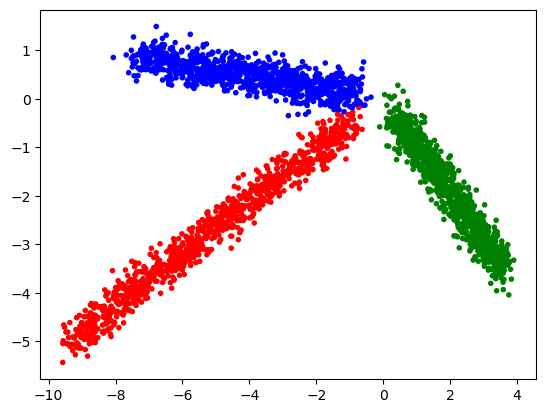

In [27]:
colors = ['r', 'g', 'b']
plt.scatter(data[:,0], data[:,1], color=[colors[labels[i]] for i in range(Ntotal)], marker='.')

In [28]:
#permute data
torch.manual_seed(43)
perm = torch.randperm(Ntotal)
data = data[perm, :]
labels = labels[perm]

#create train and test sets using 70%, 30% split

Ntrain = int(0.7*Ntotal)
Ntest = Ntotal - Ntrain
traindata = data[:Ntrain, :]
trainlabels = labels[:Ntrain]
testdata = data[Ntrain:, :]
testlabels = labels[Ntrain:]


Text(0.5, 1.0, 'Test data')

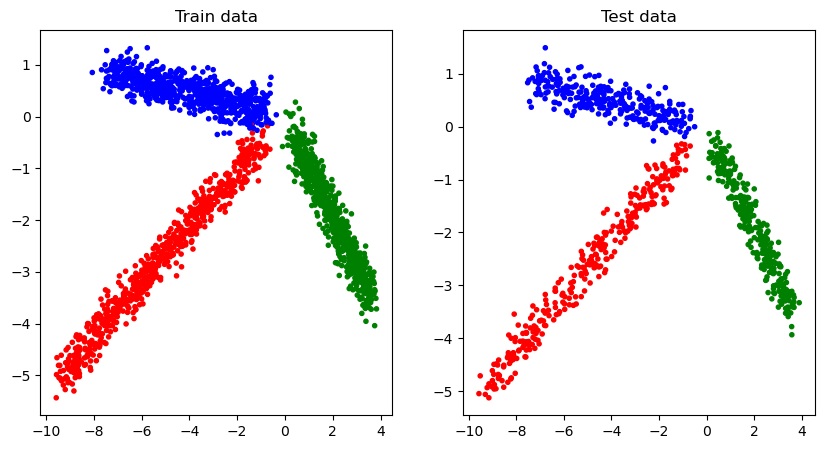

In [29]:
#visualize train and test sets in 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(traindata[:,0], traindata[:,1], color=[colors[trainlabels[i]] for i in range(Ntrain)], marker='.')
axs[0].set_title('Train data')
axs[1].scatter(testdata[:,0], testdata[:,1], color=[colors[testlabels[i]] for i in range(Ntest)], marker='.')
axs[1].set_title('Test data')

In [30]:
# dataset_dir = './data/'+f'/linearfeatures/'
# import os
# if not os.path.exists(dataset_dir):
#     os.makedirs(dataset_dir)

# torch.save({'numclusters':Ncluster,\
#             'dim':dim,\
#             'data':traindata,\
#             'labels':trainlabels}, dataset_dir+f'traindata.pt')

# torch.save({'numclusters':Ncluster,\
#             'dim':dim,\
#             'data':testdata,\
#             'labels':testlabels}, dataset_dir+f'testdata.pt')


## Create a dataset with spirals

In [46]:
dim = 2
Npercluster = 2000
Ncluster = 3
Ntotal = Npercluster * Ncluster

In [156]:
torch.manual_seed(4)

# generate data

#each spiral is defined by the slope between r and theta

slopesall = 1*torch.tensor([2.9,2.1, 2.1])
rinitall = torch.tensor([8, 0.05, 4])
thetafall = 0.6*torch.tensor([2.4*math.pi, 2.7*math.pi, 3.5*math.pi])
thetaiall = [-0.3*math.pi, 1*math.pi, 0.1]
thetaall = [torch.linspace(thetaiall[i], thetafall[i], Npercluster) for i in range(Ncluster)]
rall = [slopesall[i]*thetaall[i] + rinitall[i] for i in range(Ncluster)]
data = torch.zeros(Ntotal, dim)
labels = torch.zeros(Ntotal, dtype=int)
noisestd = 0.4
for i in range(Ncluster):
    datai = torch.stack([rall[i]*torch.cos(thetaall[i]), rall[i]*torch.sin(thetaall[i])], dim=1) + noisestd*torch.randn(Npercluster, dim)
    data[i*Npercluster:(i+1)*Npercluster, :] = datai
    labels[i*Npercluster:(i+1)*Npercluster] = i

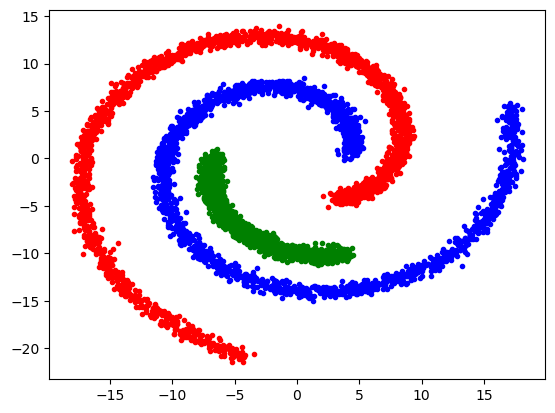

In [157]:
#visualize the 3 spirals
colors = ['r', 'g', 'b']
plt.figure()
for i in range(Ncluster):
    plt.scatter(data[i*Npercluster:(i+1)*Npercluster, 0], data[i*Npercluster:(i+1)*Npercluster, 1], color=colors[i], marker='.')



In [158]:
#permute data
torch.manual_seed(43)
perm = torch.randperm(Ntotal)
data = data[perm, :]
labels = labels[perm]

#create train and test sets using 70%, 30% split

Ntrain = int(0.7*Ntotal)
Ntest = Ntotal - Ntrain
traindata = data[:Ntrain, :]
trainlabels = labels[:Ntrain]
testdata = data[Ntrain:, :]
testlabels = labels[Ntrain:]


Text(0.5, 1.0, 'Test data')

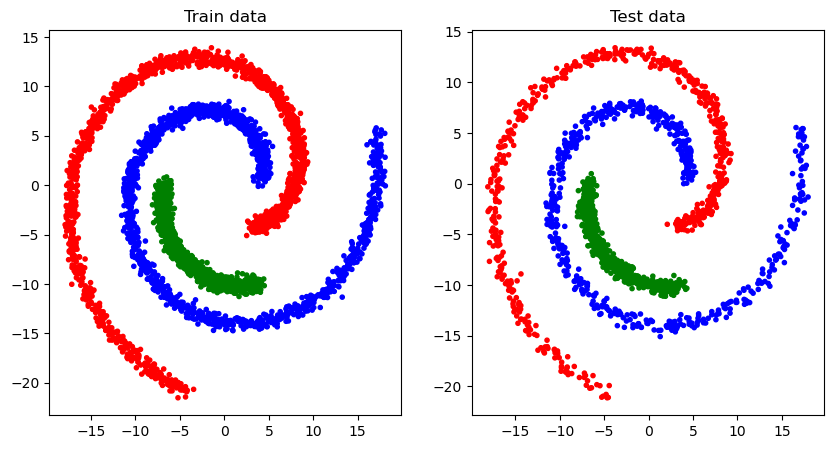

In [159]:
#visualize train and test sets in 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(traindata[:,0], traindata[:,1], color=[colors[trainlabels[i]] for i in range(Ntrain)], marker='.')
axs[0].set_title('Train data')
axs[1].scatter(testdata[:,0], testdata[:,1], color=[colors[testlabels[i]] for i in range(Ntest)], marker='.')
axs[1].set_title('Test data')

In [160]:
# dataset_dir = './data/'+f'/spiralfeatures/'
# import os
# if not os.path.exists(dataset_dir):
#     os.makedirs(dataset_dir)

# torch.save({'numclusters':Ncluster,\
#             'dim':dim,\
#             'data':traindata,\
#             'labels':trainlabels}, dataset_dir+f'traindata.pt')

# torch.save({'numclusters':Ncluster,\
#             'dim':dim,\
#             'data':testdata,\
#             'labels':testlabels}, dataset_dir+f'testdata.pt')


## Create data with 3 shapes in 2d space

In [162]:
def get_semicircle(N, center, radius, flip_y=False, noise=True, noise_level=0.1):

    x1 = 2*radius*(torch.rand((N,))-0.5)+center[0]
    
    noise_y = noise_level*radius*torch.rand((N))

    if flip_y:
        y1 = -1*torch.sqrt(radius**2 - (x1-center[0])**2)+center[1] + noise_y
    else:            
        y1 = torch.sqrt(radius**2 - (x1-center[0])**2)+center[1] + noise_y
    data = torch.stack((x1, y1),dim=-1)
    return data

In [180]:
dim = 2
Npercluster = 3000
Ncluster = 3
Ntotal = Npercluster * Ncluster

In [255]:
#choose 3 random points- corners of the triangle (inside [0,1]^2 box)
torch.manual_seed(500)
tri_corners = 9*torch.rand(3, 2)

#and 4 random points- corners of square (inside [-1,0]x[0,1] box)

# quad_corners = 3*torch.rand(4,2) + torch.tensor([[-0.5,-2.5]])
quad_corners = torch.tensor([[1.0, -2], [2.0, -2], [2.0, -0.9], [1.0, -0.9]]) + torch.tensor([[-1,2]])

#1 random point for the circle ()
circle_center = torch.tensor([[2,1.2]])
circle_rad = 1.0

#create a linspace from 0 to 1 to take convex combinations in triangle and rectangle

numsides = 3
perside = Npercluster//numsides
data_tri = torch.zeros((Npercluster, dim))
alpha = torch.linspace(0, 1, steps=Npercluster//numsides).reshape((-1,1))
errvar = 0.05

for i in range(numsides):
    data_i = alpha@tri_corners[i:i+1,:] + (1-alpha)@tri_corners[(i+1)%numsides:(i+1)%numsides+1,:]
    data_tri[perside*i:(i+1)*perside,:] = data_i + math.sqrt(errvar)*torch.randn(perside, 2)

numsides_q = 4
perside = Npercluster//numsides_q
alpha = torch.linspace(0, 1, steps=Npercluster//numsides_q).reshape((-1,1))
data_quad = torch.zeros((Npercluster, dim))
errvar_q = 0.03

for i in range(numsides_q):
    data_i = alpha@quad_corners[i:i+1,:] + (1-alpha)@quad_corners[(i+1)%numsides_q:(i+1)%numsides_q + 1,:]
    data_quad[perside*i:(i+1)*perside,:] = 4*data_i + math.sqrt(errvar_q)*torch.randn(perside, 2)


errvar_c = 0.4
perside = Npercluster//2 # 2 half circles
data_circ_top = get_semicircle(perside, circle_center.squeeze(), circle_rad, flip_y=False, noise_level=math.sqrt(errvar_c))
data_circ_bottom = get_semicircle(perside, circle_center.squeeze(), circle_rad, flip_y=True, noise_level=math.sqrt(errvar_c)) + torch.tensor([[0, 2*circle_center[0,1]]])
data_circ = torch.cat((data_circ_top, data_circ_bottom), dim=0)

data = torch.cat((data_tri, data_quad, data_circ), dim=0)
labels = torch.cat((torch.zeros(Npercluster), torch.ones(Npercluster), 2*torch.ones(Npercluster)), dim=0).long()

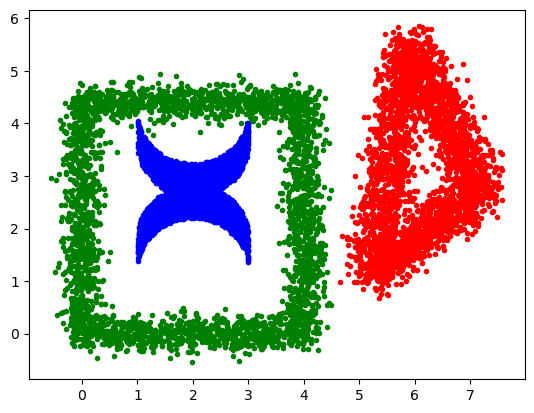

In [256]:
#visualize the 3 spirals
colors = ['r', 'g', 'b']
plt.figure()
for i in range(Ncluster):
    plt.scatter(data[i*Npercluster:(i+1)*Npercluster, 0], data[i*Npercluster:(i+1)*Npercluster, 1], color=colors[i], marker='.')



In [257]:
#permute data
torch.manual_seed(43)
perm = torch.randperm(Ntotal)
data = data[perm, :]
labels = labels[perm]


#create train and test sets using 70%, 30% split

Ntrain = int(0.7*data.shape[0])
Ntest = data.shape[0] - Ntrain
traindata = data[:Ntrain, :]
trainlabels = labels[:Ntrain]
testdata = data[Ntrain:, :]
testlabels = labels[Ntrain:]


Text(0.5, 1.0, 'Test data')

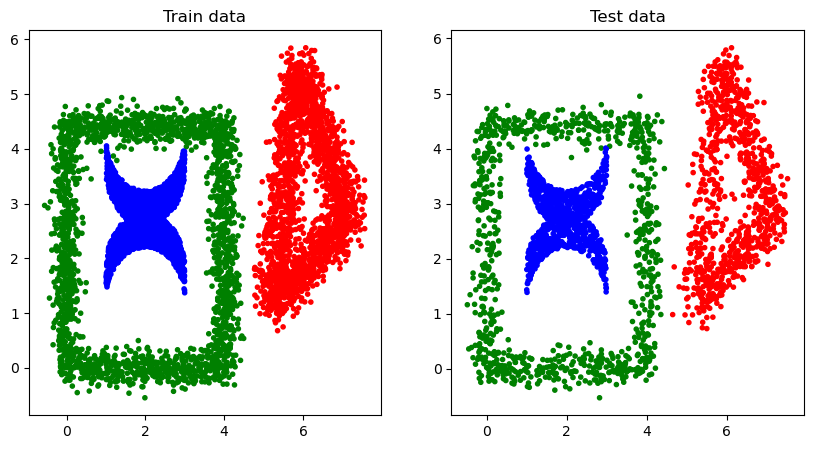

In [258]:
#visualize train and test sets in 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(traindata[:,0], traindata[:,1], color=[colors[trainlabels[i]] for i in range(Ntrain)], marker='.')
axs[0].set_title('Train data')
axs[1].scatter(testdata[:,0], testdata[:,1], color=[colors[testlabels[i]] for i in range(Ntest)], marker='.')
axs[1].set_title('Test data')

In [259]:
# dataset_dir = './data/'+f'/shapefeatures/'
# import os
# if not os.path.exists(dataset_dir):
#     os.makedirs(dataset_dir)

# torch.save({'numclusters':Ncluster,\
#             'dim':dim,\
#             'data':traindata,\
#             'labels':trainlabels}, dataset_dir+f'traindata.pt')

# torch.save({'numclusters':Ncluster,\
#             'dim':dim,\
#             'data':testdata,\
#             'labels':testlabels}, dataset_dir+f'testdata.pt')
